## Load Basic Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [36]:
df = pd.read_csv('census.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [38]:
df.shape

(32560, 15)

In [39]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [40]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [41]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


### Value Count Function

In [11]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [12]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [16]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [18]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [19]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [21]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

### Filling ? values

In [23]:
#replace the values with mode


In [25]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
    df['native-country'] = df['native-country'].replace('?', 'United-States')

In [29]:
df.head(8)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [44]:
df = df.drop(['Education_num', 'Fnlwgt'], axis = 1)
df.head(1)

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [43]:

# Calculate the correlation between "education" and "education number"
correlation = df['Education'].str.strip().str.lower().str.replace('.', '').factorize()[0].corr(df['Education_num'])

print("Correlation between Education and Education Number:", correlation)


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

### Feature Engineering

In [45]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.Education = df.Education.replace('Bachelors', 'undergrad')
df.Education = df.Education.replace('Masters', 'grad')
df.Education = df.Education.replace('Doctorate', 'doc')



In [47]:
#martial status
df['Marital_status']= df['Marital_status'].replace(['Married_civ-spouse', 'Married_AF_spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace(['Never_married'], 'not_married')
df['Marital_status']= df['Marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married_spouse_absent'], 'other')

In [48]:
# income
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [49]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [50]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [51]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [52]:
df.corr()

,Age,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,0.077674,0.057775,0.068756
Capital_gain,0.077674,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,0.078409,0.054256,1.000000


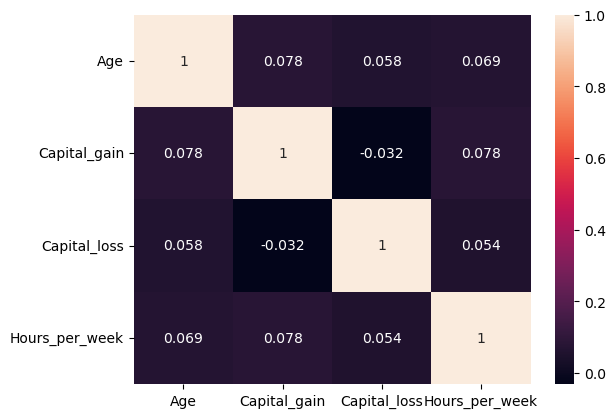

In [53]:
sns.heatmap(df.corr(), annot=True);

### Histogram

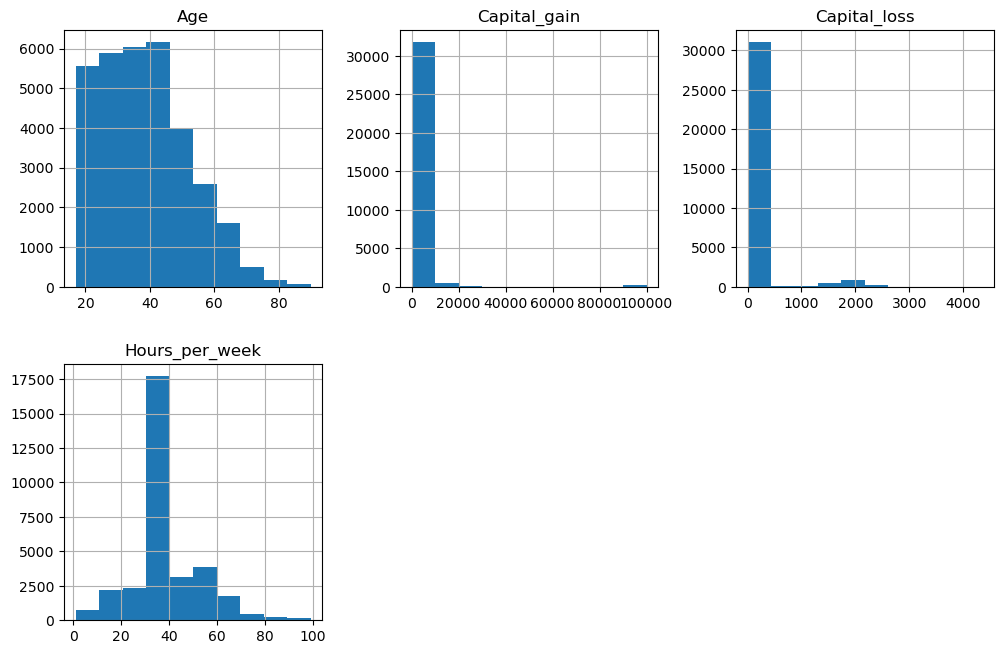

In [54]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

## BoxPlot

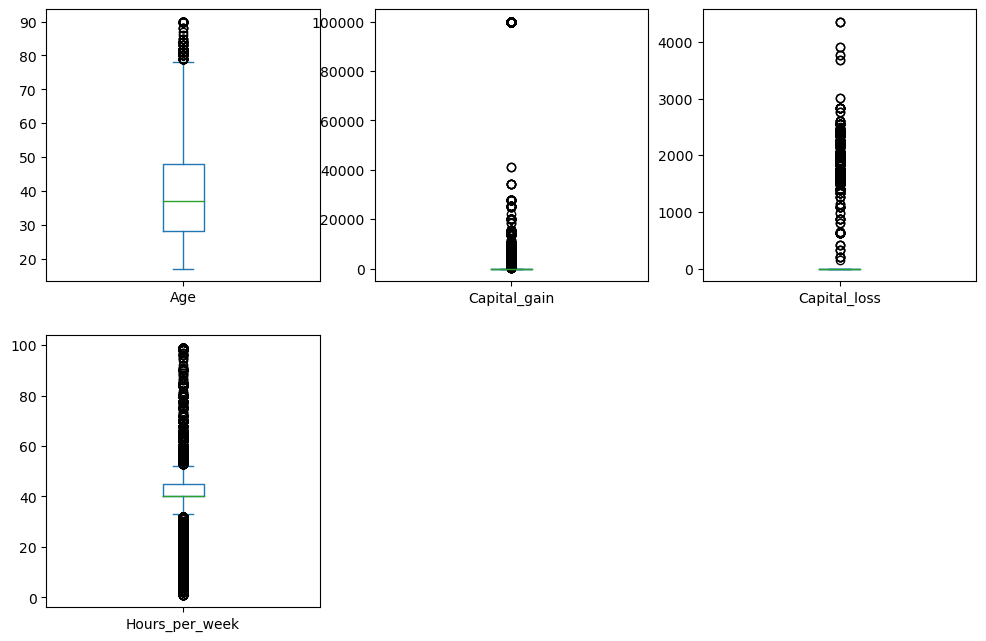

In [55]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

### Plotly

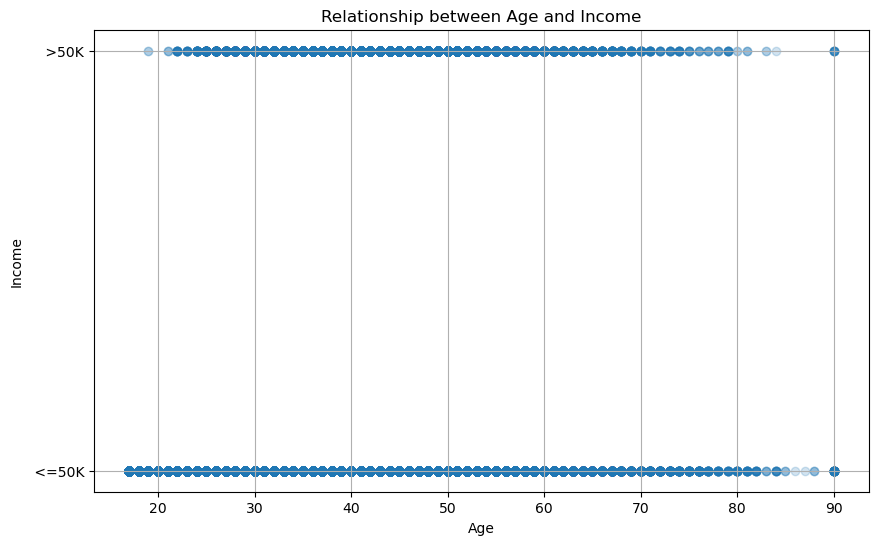

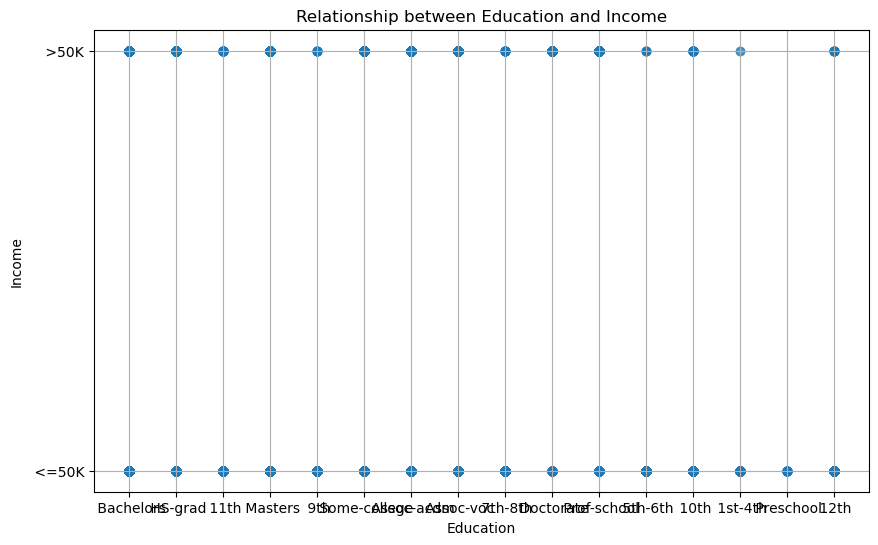

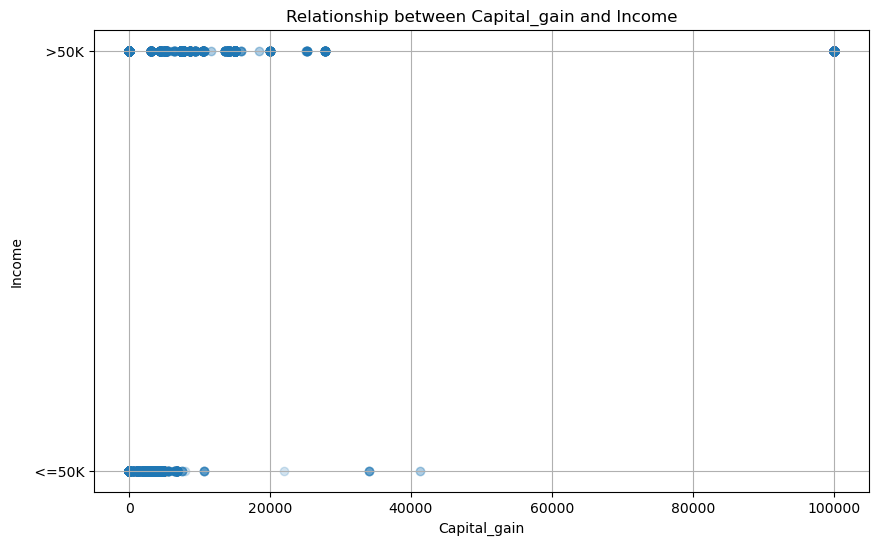

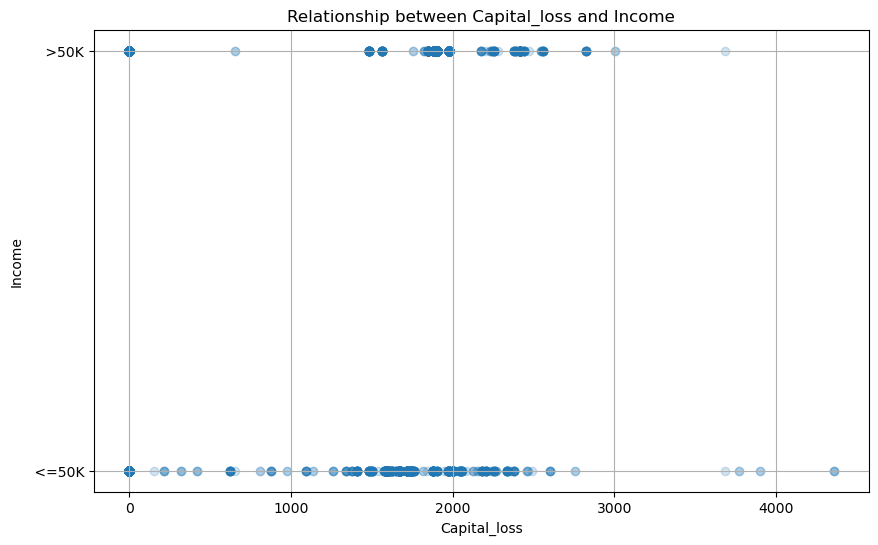

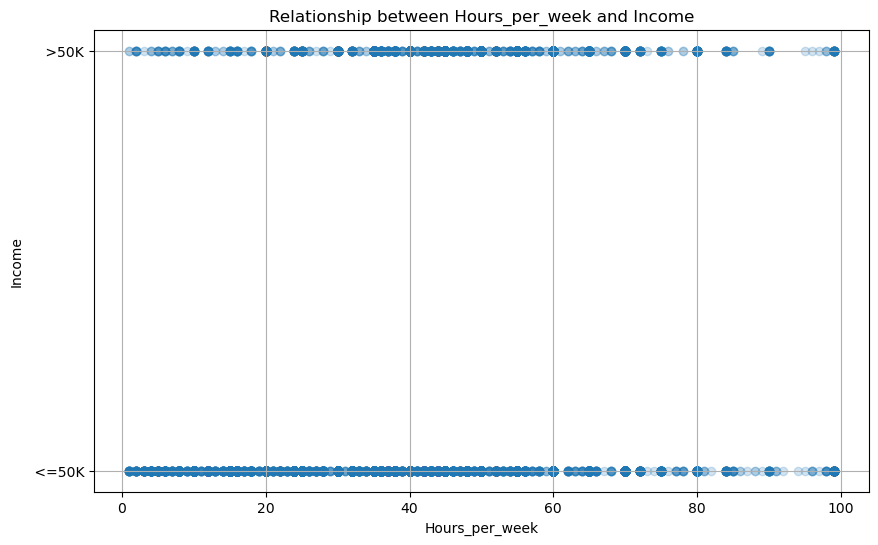

In [62]:
target_variable = 'Income'

# Plot the relationship between features and the target variable
features = ['Age', 'Education', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target_variable], alpha=0.2)
    plt.title(f'Relationship between {feature} and {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()



### Model Building

In [63]:
X= df.drop(['Income'], axis=1)
y = df['Income']

### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [65]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()


,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,9,2,3,0,4,1,0,0,12,38,0
1,21,3,11,0,5,1,4,1,0,0,39,38,0
2,36,3,1,2,5,0,2,1,0,0,39,38,0
3,11,3,9,2,9,5,2,0,0,0,39,4,0
4,20,3,12,2,3,5,4,0,0,0,39,38,0


In [66]:
ss= StandardScaler().fit(df1.drop('Income', axis=1))

In [67]:
X= ss.transform(df1.drop('Income', axis=1))
y= df['Income']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.801
Acc on test data: 0.807


## Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 0.979
Acc on test data: 0.859


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [72]:
print(confusion_matrix(y_test, prediction1))

[[5789  412]
 [ 736 1203]]


In [73]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6201
        >50K       0.74      0.62      0.68      1939

    accuracy                           0.86      8140
   macro avg       0.82      0.78      0.79      8140
weighted avg       0.85      0.86      0.85      8140



In [74]:
#Precision: tp/tp+fp

print('Precision =' , 10332/(10332+1286))
    

Precision = 0.8893096918574626


In [75]:
# recall= tp/tp+fn

print('Recall =', 10332/(10332+806))

Recall = 0.9276351230023343


### for other class : 1 (>50K)

In [74]:
print('Precision = ', 2229/(2229+806))

Precision =  0.7344316309719934


In [75]:
print('Recall= ', 2229/(2229+1286))

Recall=  0.6341394025604552
